In [50]:
import pandas as pd
df =  pd.read_csv('../z20_data/drinks.csv')
df.head(20)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [5]:
# 대륙 간 국가 개수
df['continent'].value_counts()

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

In [7]:
# 대륙 간 맥주 소비량
df.groupby('continent')['beer_servings'].sum()

continent
AF    3258
AS    1630
EU    8720
OC    1435
SA    2101
Name: beer_servings, dtype: int64

In [12]:
# AF 의 맥주 소비량
df[df['continent'] == 'AF'].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,AF
4,Angola,217,57,45,5.9,AF
18,Benin,34,4,13,1.1,AF
22,Botswana,173,35,35,5.4,AF
26,Burkina Faso,25,7,7,4.3,AF


In [13]:
df[df['continent'] == 'AF']['beer_servings'].head()


2      25
4     217
18     34
22    173
26     25
Name: beer_servings, dtype: int64

In [14]:
# 대륙 별 평균 와인 소비량
df.groupby('continent')['wine_servings'].mean()

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
SA     62.416667
Name: wine_servings, dtype: float64

In [16]:
# 상관계수 구하는 함수 corr(method=)
corr = df[['beer_servings','wine_servings']].corr(method='pearson')
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [17]:
# 4개 모두 다 상관관계 행렬 구현
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
df[cols].corr(method='pearson')

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [20]:
# 대륙 별 맥주 소비량 agg
df.groupby('continent')['beer_servings'].agg(['mean','min','max','sum'])

,mean,min,max,sum
continent,,,,
AF,61.471698,0,376,3258
AS,37.045455,0,247,1630
EU,193.777778,0,361,8720
OC,89.687500,0,306,1435
SA,175.083333,93,333,2101


In [21]:
# 와인
df.groupby('continent')['wine_servings'].agg(['mean','min','max','sum'])


,mean,min,max,sum
continent,,,,
AF,16.264151,0,233,862
AS,9.068182,0,123,399
EU,142.222222,0,370,6400
OC,35.625000,0,212,570
SA,62.416667,1,221,749


In [30]:
df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).index


Index(['EU', 'AF', 'SA', 'AS', 'OC'], dtype='object', name='continent')

In [29]:
# 가장 소비량이 많은
df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).values


array([8720, 3258, 2101, 1630, 1435], dtype=int64)

<BarContainer object of 5 artists>

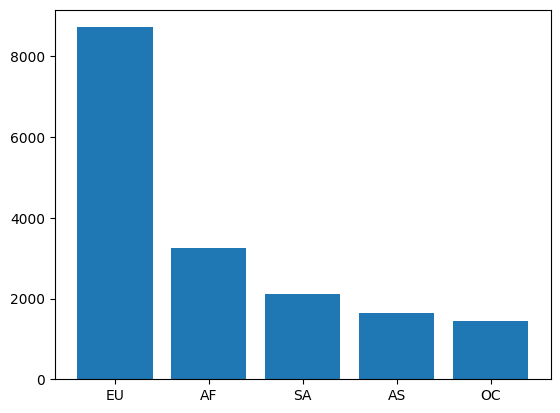

In [32]:
import matplotlib.pyplot as plt
x = df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).index
y = df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).values

# plt.plot(x,y)
plt.bar(x,y)


In [43]:
# AF, EU 맥주 소비량의 차이
beer = df.groupby('continent')['beer_servings'].sum()
beer[['EU','AF']]
beer['EU'] - beer['AF']

5462

In [51]:
# 컬럼 모든 술의 총량?
df['total_servings'] = df['beer_servings'] + df['spirit_servings'] + df['wine_servings']


In [62]:
# 술 소비량 대비 알콜 비율이 어느정도?
df['alcohol_rate'] = df['total_litres_of_pure_alcohol']/df['total_servings']
df

# al_rate 역순정렬
df[['country','alcohol_rate']].sort_values('alcohol_rate',ascending=False).head(20)


,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
183,Tanzania,0.132558
26,Burkina Faso,0.110256
33,Central African Republic,0.090000
28,Cote d'Ivoire,0.088889
104,Mali,0.085714


<BarContainer object of 20 artists>

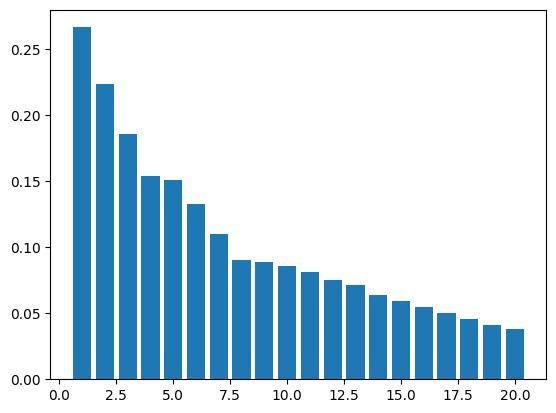

In [71]:
import matplotlib.pyplot as plt

df_country = df.sort_values('alcohol_rate',ascending=False).head(20)['country']
df_alcohol_rate = df.sort_values('alcohol_rate',ascending=False).head(20)['alcohol_rate']

# x = df_country
i_list = [i+1 for i in range(len(df_country))]
x = i_list
y = df_alcohol_rate

plt.bar(x,y)